# <ins>Confidence Intervals<ins> 


For the muesli order data set, calculate the 95% confidence intervals for the mean of the profit feature using bootstrapping. Create a notebook in which following questions shall be solved:

1. Initialize empty list called `sample_means`
2. Create a `for loop` that will loop 10,000 times
3. In each iteration using the pandas method `.sample()` sample 100 profits with replacement
4. Also in that same iteration take the mean of these 100 samples and then append it to the `sample_means` list
5. Using `sns.displot` plot the distribution of the `sample_means` list
6. Convert `sample_means` list to **pandas** `Series`
7. Using pandas `.quantile()` calculate the upper (0.975) and lower (0.025) limits of the confidence interval of the `sample_means` Series


### <ins>Bonus<ins>

8. Calculate using the `z-value` formula
9. Compare to the results of the bootstrapping method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('./merged_agg_muesli.csv',
                        parse_dates=['order_date', 'rdy2ship_date', 'pickup_date','on_truck_scan_date', 'arrival_scan_date'],
                        dayfirst=True)

df.head()

,order_id,order_date,ship_mode,processing_mode,rdy2ship_date,pickup_date,customer_id,customer_name,on_truck_scan_date,arrival_scan_date,...,categories,sub_categories,product_ids,quantity_ttl,sales_ttl,discount_ttl,profit_ttl,order_to_truck_time,processing_time,waiting_time
0,CA-2019-121755,2019-01-16,Second Class,Standard Processing,NaT,NaT,EH-13945,Eric Hoffmann,2019-01-23,NaT,...,"Special Projects Muesil, Power Muesli","Gluten Free, Super Fibre Boost","TEC-AC-10003027, OFF-BI-10001634",5,102.218,0.2,15.9965,7.0,NaN,NaN
1,CA-2019-118255,2019-03-11,First Class,Express,NaT,NaT,ON-18715,Odella Nelson,2019-03-13,NaT,...,"Special Projects Muesil, Power Muesli","Gluten Free, Super Fibre Boost","TEC-AC-10000171, OFF-BI-10003291",4,63.440,0.0,27.9776,2.0,NaN,NaN
2,CA-2019-169194,2019-06-20,Standard Class,Standard Processing,NaT,NaT,LH-16900,Lena Hernandez,2019-06-26,NaT,...,"Special Projects Muesil, Special Projects Muesil","Gluten Free, Only Oats","TEC-AC-10002167, TEC-PH-10003988",5,66.800,0.0,11.0540,6.0,NaN,NaN
3,CA-2019-111682,2019-06-17,First Class,Express,NaT,NaT,TB-21055,Ted Butterfield,2019-06-19,NaT,...,"Special Projects Muesil, Power Muesli, Power M...","Gluten Free, Nuts and more, Nuts and more, Ste...","TEC-AC-10002167, OFF-PA-10001569, OFF-PA-10000...",25,655.090,0.3,102.2808,2.0,NaN,NaN
4,CA-2018-135545,2018-11-24,Standard Class,NaN,NaT,NaT,KM-16720,Kunst Miller,NaT,NaT,...,"Special Projects Muesil, Power Muesli, Power M...","Gluten Free, Nuts and more, Super Fibre Boost,...","TEC-AC-10004633, OFF-PA-10003892, OFF-BI-10001...",15,266.294,0.2,106.8083,NaN,NaN,NaN


## 1. Initialize empty list called sample_means

In [3]:
sample_means = []

## 2. Create a for loop that will loop 10,000 times

```python
for i in range(10_000):
````


## 3. In each iteration using the pandas method .sample() sample 100 profits with replacement

In [4]:
# create and save a new DF of 100 samples from the origianl DF...
#... otherwise we will create a new/different each iteration 

df_prof = df[df['profit_ttl'].notnull()]

profit_sample = df_prof['profit_ttl'].sample(100)

```python
for i in range(10_000):
    bootstrap_samp = profit_sample(frac=1, replace=True)
```

## 4. Also in that same iteration take the mean of these 100 samples and then append it to the sample_means list

```python

sample_means = []

for i in range(10_000):
    bootstrap_samp = profit_sample.sample(frac=1, replace=True)
    sample_means.append(bootstrap_samp.mean())   
    
````


In [5]:
sample_means = []

for i in range(10_000):
    bootstrap_samp = profit_sample.sample(frac=1, replace=True)
    sample_means.append(bootstrap_samp.mean())

In [6]:
# 5.Using sns.displot plot the distribution of the sample_means list

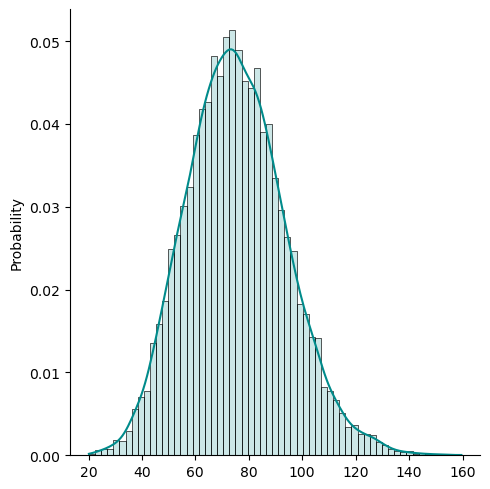

In [7]:
sns.displot(sample_means, kde=True, stat = 'probability', color='darkcyan', alpha=0.2);

## 6. Convert sample_means list to pandas Series

In [8]:
series_means = pd.Series(sample_means)

In [9]:
# 7.Using pandas .quantile() calculate the upper (0.975) and lower (0.025) limits of the confidence interval...
#... of the sample_means Series

In [10]:
clvl = 0.95
lower_quantile = round(((1-clvl)/2),3)  
upper_quantile = clvl + ((1-clvl)/2)

upper_quantile, lower_quantile

(0.975, 0.025)

In [11]:
# series_means = pd.Series(sample_means)

lower = series_means.quantile(lower_quantile)

upper = series_means.quantile(upper_quantile)

In [12]:
lower, upper

(42.0524661, 113.97956524999996)

In [13]:
bootstrap_means = series_means.mean()
bootstrap_means

75.3702554526

In [14]:
# lower = series_means.quantile(lower_quantile)
# upper = series_means.quantile(upper_quantile)

bootstrap_dict= {
    'min': round((profit_sample.min()),3),
    'lower' : lower.round(3),
    'mean' : bootstrap_means.round(3),
    'upper' : upper.round(3),
    'max' : round((profit_sample.max()),3)
    }

In [15]:
pd.DataFrame([bootstrap_dict], index=['bootstrap'])

,min,lower,mean,upper,max
bootstrap,-258.595,42.052,75.37,113.98,1177.386


## 8. Calculate using the z-value formula

In [16]:
prof_samp_mean = round((profit_sample.mean()),3)
prof_samp_std = round((profit_sample.std()),3)

prof_samp_mean, prof_samp_std

(75.846, 185.586)

In [17]:
# Confidence level (clvl) = 0.95, then z = 1.96

z = 1.96
n = len(profit_sample)

# mean + (z-value * std) / SquareRoot of number of values
lower_limit_eq = (prof_samp_mean - ((z*prof_samp_std)/np.sqrt(n))).round(3)
upper_limit_eq = (prof_samp_mean + ((z*prof_samp_std)/np.sqrt(n))).round(3)

In [18]:
lower_limit_eq, upper_limit_eq

(39.471, 112.221)

In [19]:
n

100

In [20]:
# 9.Compare to the results of the bootstrapping method

In [21]:
z_dict= {
    'min': round((profit_sample.min()),3),
    'lower' : lower_limit_eq.round(3),
    'mean': prof_samp_mean,
    'upper' : upper_limit_eq.round(3),
    'max' : round((profit_sample.max()),3)
    }
df_compare = pd.DataFrame([bootstrap_dict, z_dict], index=['bootstrap', 'equation'])
df_compare

,min,lower,mean,upper,max
bootstrap,-258.595,42.052,75.370,113.980,1177.386
equation,-258.595,39.471,75.846,112.221,1177.386


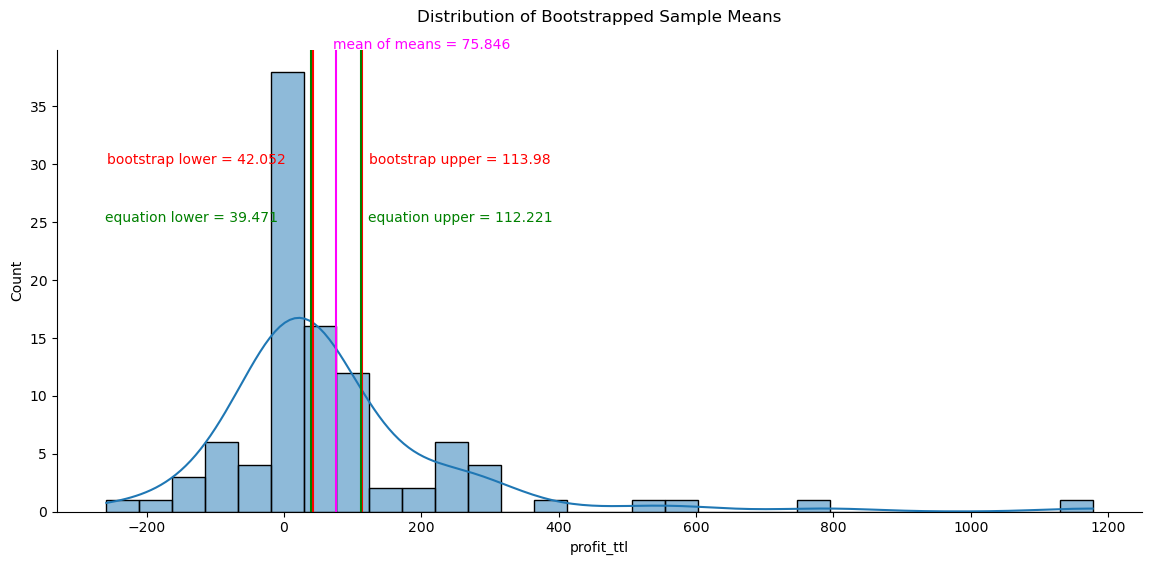

In [27]:
# post-lecture add-on: comparing the lower and upper limits (bootstrap vs equation) in our histogram

plt.figure(figsize=(14,6))

# Bootstrapped Means
sns.histplot(profit_sample, kde=True, bins=30)

# line and value annotation for the mean of bootstrapped means
plt.axvline(x= prof_samp_mean, color='fuchsia')
plt.text(prof_samp_mean-5, 40, f'mean of means = {prof_samp_mean.round(3)}', color='fuchsia', rotation = 0)

# lines and value annotations for lower/upper limits  from the bootstrapping method
plt.axvline(lower.round(3), color='r')
plt.axvline(upper.round(3), color='r')
plt.text(lower-300, 30, f'bootstrap lower = {lower.round(3)}', color='r')
plt.text(upper+10, 30, f'bootstrap upper = {upper.round(3)}', color='r')

# lines and value annotations for lower/upper limits calculated with the equation
plt.axvline(lower_limit_eq.round(3), color='g')
plt.axvline(upper_limit_eq.round(3), color='g')
plt.text(lower_limit_eq-300, 25, f'equation lower = {lower_limit_eq.round(3)}', color='g')
plt.text(upper_limit_eq+10, 25, f'equation upper = {upper_limit_eq.round(3)}', color='g')

sns.despine();
plt.title('Distribution of Bootstrapped Sample Means', pad=20);